In [ ]:
import pandas as pd

##Import data from a dataset
df = pd.read_csv("customer_churn.csv")
df.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [ ]:
# Verification of data structure and quality
df.shape
df.info()
df.isna().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  object 
 1   gender                  10000 non-null  object 
 2   age                     10000 non-null  int64  
 3   country                 10000 non-null  object 
 4   city                    10000 non-null  object 
 5   customer_segment        10000 non-null  object 
 6   tenure_months           10000 non-null  int64  
 7   signup_channel          10000 non-null  object 
 8   contract_type           10000 non-null  object 
 9   monthly_logins          10000 non-null  int64  
 10  weekly_active_days      10000 non-null  int64  
 11  avg_session_time        10000 non-null  float64
 12  features_used           10000 non-null  int64  
 13  usage_growth_rate       10000 non-null  float64
 14  last_login_days_ago     10000 non-null 

np.int64(0)

In [ ]:
# Viewing dataset features
print(df.columns.tolist())

['customer_id', 'gender', 'age', 'country', 'city', 'customer_segment', 'tenure_months', 'signup_channel', 'contract_type', 'monthly_logins', 'weekly_active_days', 'avg_session_time', 'features_used', 'usage_growth_rate', 'last_login_days_ago', 'monthly_fee', 'total_revenue', 'payment_method', 'payment_failures', 'discount_applied', 'price_increase_last_3m', 'support_tickets', 'avg_resolution_time', 'complaint_type', 'csat_score', 'escalations', 'email_open_rate', 'marketing_click_rate', 'nps_score', 'survey_response', 'referral_count', 'churn']


In [ ]:
# Removing duplicates 
df = df.drop_duplicates()
df = df.dropna(subset=["churn"])

In [ ]:
# Viewing data after removing duplicates  
print(f"Size after cleaning: {df.shape}")
print(f"Missing values in churn: {df['churn'].isna().sum()}")

Size after cleaning: (10000, 32)
Missing values in churn: 0


Min age: 18.0
Max age: 74.0
___________
   age age_group
0   68       60+
1   57     45–59
2   24     18–29
3   49     45–59
4   65       60+
5   36     30–44
6   23     18–29
7   37     30–44
8   44     30–44
9   70       60+
_________
age_group
30–44    2751
60+      2602
45–59    2586
18–29    2061
Name: count, dtype: int64
_________


/var/folders/h8/k1l_5mk10p1gqlw490kxksgw0000gn/T/ipykernel_86228/305323530.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")


,age_group,users,churn_rate
0,18–29,2061,9.75
1,30–44,2751,10.29
2,45–59,2586,9.98
3,60+,2602,10.72


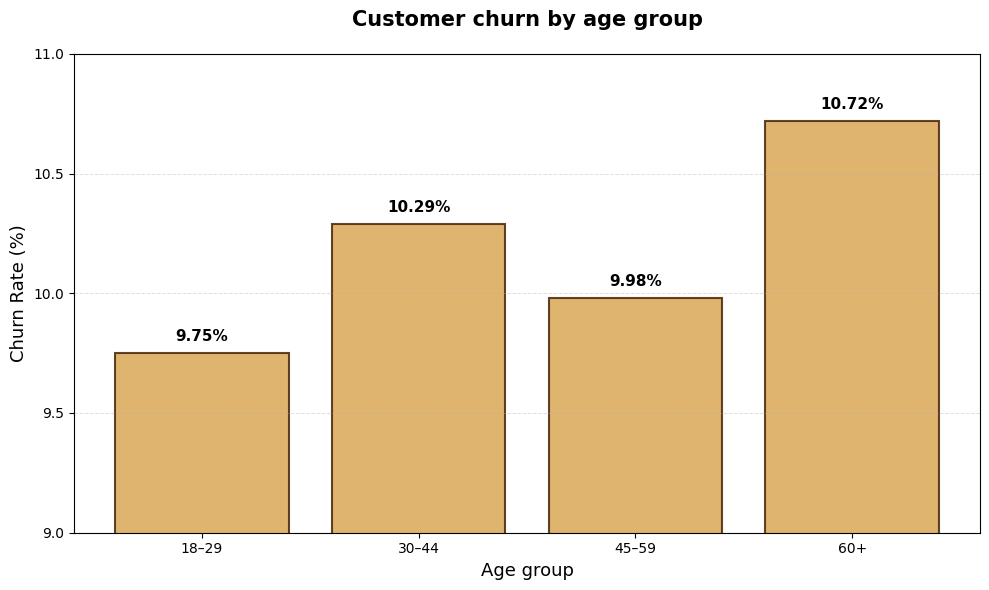

In [ ]:
## Churn by Age Segment

##Checking for anomalies
desc = df["age"].describe()
print(f"Min age: {desc['min']}")
print(f"Max age: {desc['max']}")
print("___________")

##Distribution by groups
df["age_group"] = pd.cut(
    df["age"],
    bins=[17, 29, 44, 59, df["age"].max()],
    labels=["18–29", "30–44", "45–59", "60+"]
)

##Distribution check
print(df[["age", "age_group"]].head(10))
print("_________")
print(df["age_group"].value_counts())
print("_________")

##Calculating churn rate by age segment
churn_by_age = (
    df.groupby("age_group")
      .agg(
          users=("customer_id", "count"),
          churn_rate=("churn", lambda x: round(x.mean() * 100, 2))
      )
      .reset_index()
)

churn_by_age
display(churn_by_age)

##Visualization in graphics
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(churn_by_age["age_group"], churn_by_age["churn_rate"], 
        color='#DAA755', edgecolor='#462506', linewidth=1.5, alpha=0.85)

plt.xlabel('Age group', fontsize=13)
plt.ylabel('Churn Rate (%)', fontsize=13)
plt.title('Customer churn by age group', fontsize=15, fontweight='bold', pad=20)

plt.ylim(9, 11)  # from 9% to 11%
plt.yticks([9.0, 9.5, 10.0, 10.5, 11.0])  # with step 0.5%

# Adding values on columns
for i, v in enumerate(churn_by_age["churn_rate"]):
    plt.text(i, v + 0.05, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.4, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


Min tenure: 1.0
Max tenure: 59.0
Mean tenure: 30.1557
___________
tenure_group
0–6      1032
7–12     1018
13–24    1987
24-48    4059
48-59    1904
Name: count, dtype: int64
_________


/var/folders/h8/k1l_5mk10p1gqlw490kxksgw0000gn/T/ipykernel_86228/1603143784.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")


,tenure_group,users,churn_rate_tenure
0,0–6,1032,28.10
1,7–12,1018,8.84
2,13–24,1987,8.76
3,24-48,4059,7.69
4,48-59,1904,8.14


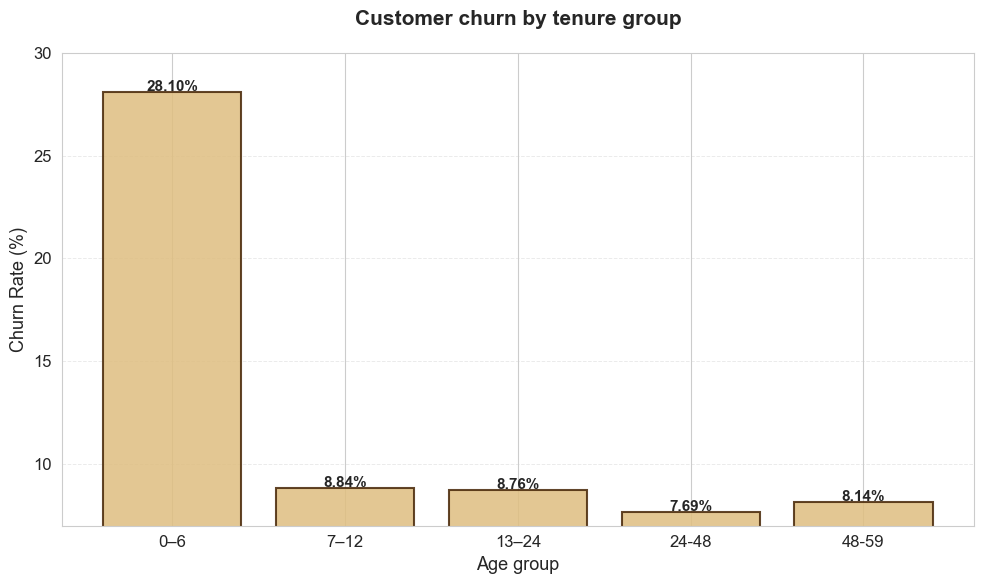

In [ ]:
## Churn by Tenure Segment

##Checking for anomalies
desc_tenure = df["tenure_months"].describe()
print(f"Min tenure: {desc_tenure['min']}")
print(f"Max tenure: {desc_tenure['max']}")
print(f"Mean tenure: {desc_tenure['mean']}")
print("___________")

##Distribution by groups
df["tenure_group"] = pd.cut(
    df["tenure_months"],
    bins=[0, 6, 12, 24, 48, df["tenure_months"].max()],
    labels=["0–6", "7–12", "13–24", "24-48", "48-59"]
)

##Distribution check
print(df["tenure_group"].value_counts().sort_index())
print("_________")

##Calculating churn rate by tenure segment
churn_by_tenure = (
    df.groupby("tenure_group")
      .agg(
          users=("customer_id", "count"),
          churn_rate_tenure=("churn", lambda x: round(x.mean() * 100, 2))
      )
      .reset_index()
)

churn_by_tenure
display(churn_by_tenure)

##Visualization in graphics

plt.figure(figsize=(10, 6))
plt.bar(churn_by_tenure["tenure_group"], churn_by_tenure["churn_rate_tenure"], 
        color='#DFBE80', edgecolor='#462506', linewidth=1.5, alpha=0.85)

plt.xlabel('Age group', fontsize=13)
plt.ylabel('Churn Rate (%)', fontsize=13)
plt.title('Customer churn by tenure group', fontsize=15, fontweight='bold', pad=20)

plt.ylim(7, 30)  # from 9% to 11%

# Adding values on columns
for i, v in enumerate(churn_by_tenure["churn_rate_tenure"]):
    plt.text(i, v + 0.05, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.4, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()




Min usage_growth_rate: -0.58
Max usage_growth_rate: 0.54
Mean usage_growth_rate: 0.019423000000000003
usage_growth_group
Very low     2001
Low          2061
Medium       2100
High         1878
Very high    1960
Name: count, dtype: int64
_________


/var/folders/h8/k1l_5mk10p1gqlw490kxksgw0000gn/T/ipykernel_86228/1252995873.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("usage_growth_group")


,usage_growth_group,users,churn_rate_usage_growth_rate
0,Very low,2001,9.90
1,Low,2061,9.22
2,Medium,2100,10.43
3,High,1878,11.45
4,Very high,1960,10.15


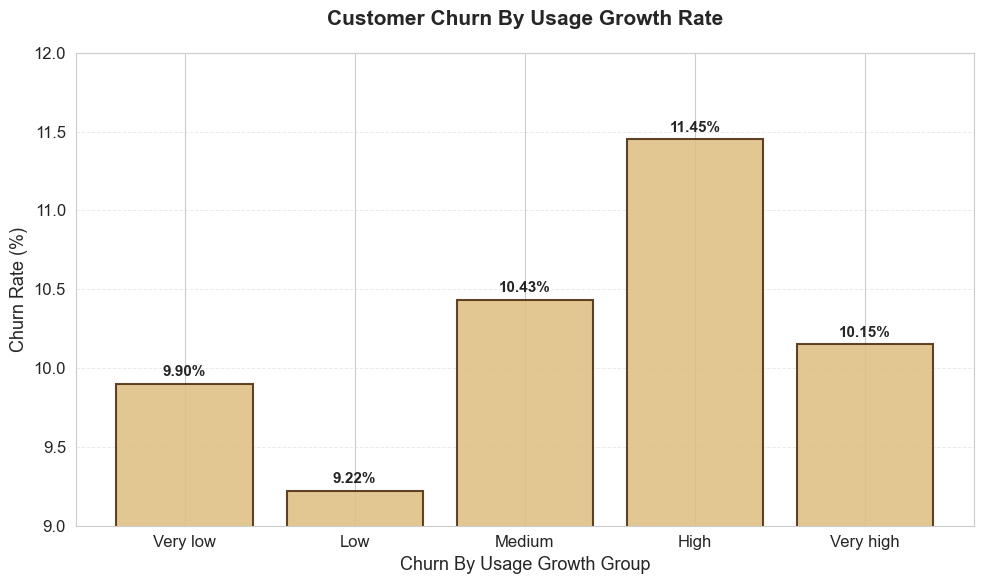

In [ ]:
## Usage_growth_rate threshold, after which churn decreases

##Checking for anomalies
desc_usage_growth_rate = df["usage_growth_rate"].describe()
df["usage_growth_rate"].describe()
print(f"Min usage_growth_rate: {desc_usage_growth_rate['min']}")
print(f"Max usage_growth_rate: {desc_usage_growth_rate['max']}")
print(f"Mean usage_growth_rate: {desc_usage_growth_rate['mean']}")

##Distribution by groups
df["usage_growth_group"] = pd.qcut(
    df["usage_growth_rate"],
    q = 5,
    labels=["Very low", "Low", "Medium", "High", "Very high"],
    duplicates='drop'
)

##Distribution check
print(df["usage_growth_group"].value_counts().sort_index())
print("_________")

##Calculating churn rate by usage_growth_rate
churn_by_usage_growth_rate = (
    df.groupby("usage_growth_group")
      .agg(
          users=("customer_id", "count"),
          churn_rate_usage_growth_rate=("churn", lambda x: round(x.mean() * 100, 2))
      )
      .reset_index()
)

churn_by_usage_growth_rate
display(churn_by_usage_growth_rate)


##Visualization in graphics

plt.figure(figsize=(10, 6))
plt.bar(churn_by_usage_growth_rate["usage_growth_group"], churn_by_usage_growth_rate["churn_rate_usage_growth_rate"], 
        color='#DFBE80', edgecolor='#462506', linewidth=1.5, alpha=0.85)

plt.xlabel('Churn By Usage Growth Group', fontsize=13)
plt.ylabel('Churn Rate (%)', fontsize=13)
plt.title('Customer Churn By Usage Growth Rate', fontsize=15, fontweight='bold', pad=20)

plt.ylim(9, 12)  # from 9% to 11%

# Adding values on columns
for i, v in enumerate(churn_by_usage_growth_rate["churn_rate_usage_growth_rate"]):
    plt.text(i, v + 0.05, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.4, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()





  contract_type  users  churn_rate
2        Yearly   1983       10.34
0       Monthly   4967       10.33
1     Quarterly   3050        9.93


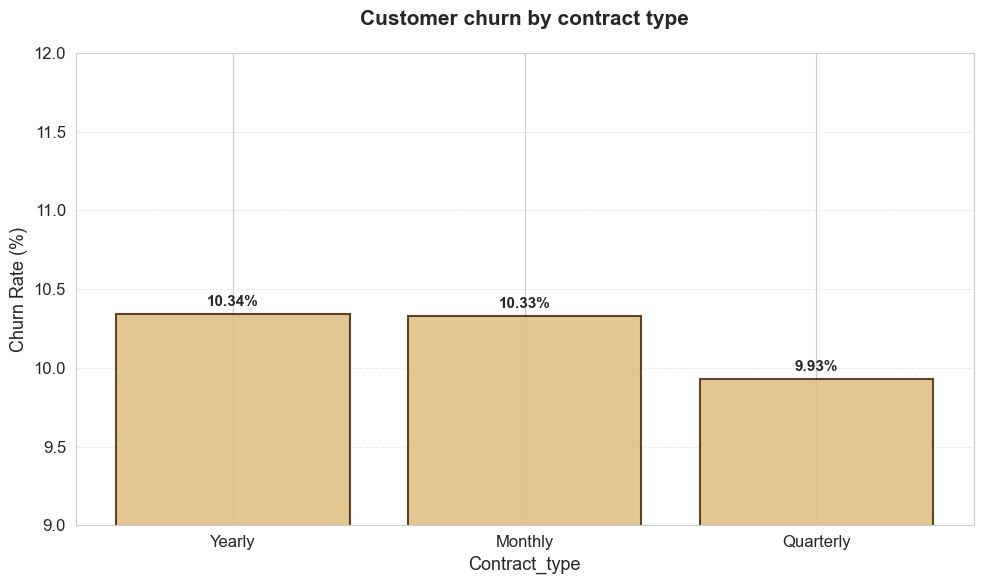

In [ ]:
##Which type of contract has the highest outflow, and which has the lowest?

##Check all values
df["contract_type"].value_counts()

##Calculating churn rate by contract type
churn_by_contract = (
    df.groupby("contract_type")
    .agg(
        users=("customer_id", "count"),
        churn_rate=("churn", lambda x: round(x.mean() * 100, 2))
    )
    .reset_index()
    .sort_values("churn_rate", ascending=False)
)

print(churn_by_contract)

##Visualization
plt.figure(figsize=(10, 6))
plt.bar(churn_by_contract["contract_type"], 
        churn_by_contract["churn_rate"],
        color='#DFBE80', 
        edgecolor='#462506', 
        linewidth=1.5, 
        alpha=0.85)

plt.xlabel('Contract_type', fontsize=13)
plt.ylabel('Churn Rate (%)', fontsize=13)
plt.title('Customer churn by contract type', fontsize=15, fontweight='bold', pad=20)

plt.ylim(9, 12)  # from 9% to 12%

# Adding values on columns
for i, v in enumerate(churn_by_contract["churn_rate"]):
    plt.text(i, v + 0.05, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.4, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()




Amount of users:
churn                      0    1
price_increase_last_3m           
No                      7236  819
Yes                     1743  202

Percentage (%)
churn                       0      1
price_increase_last_3m              
No                      89.83  10.17
Yes                     89.61  10.39


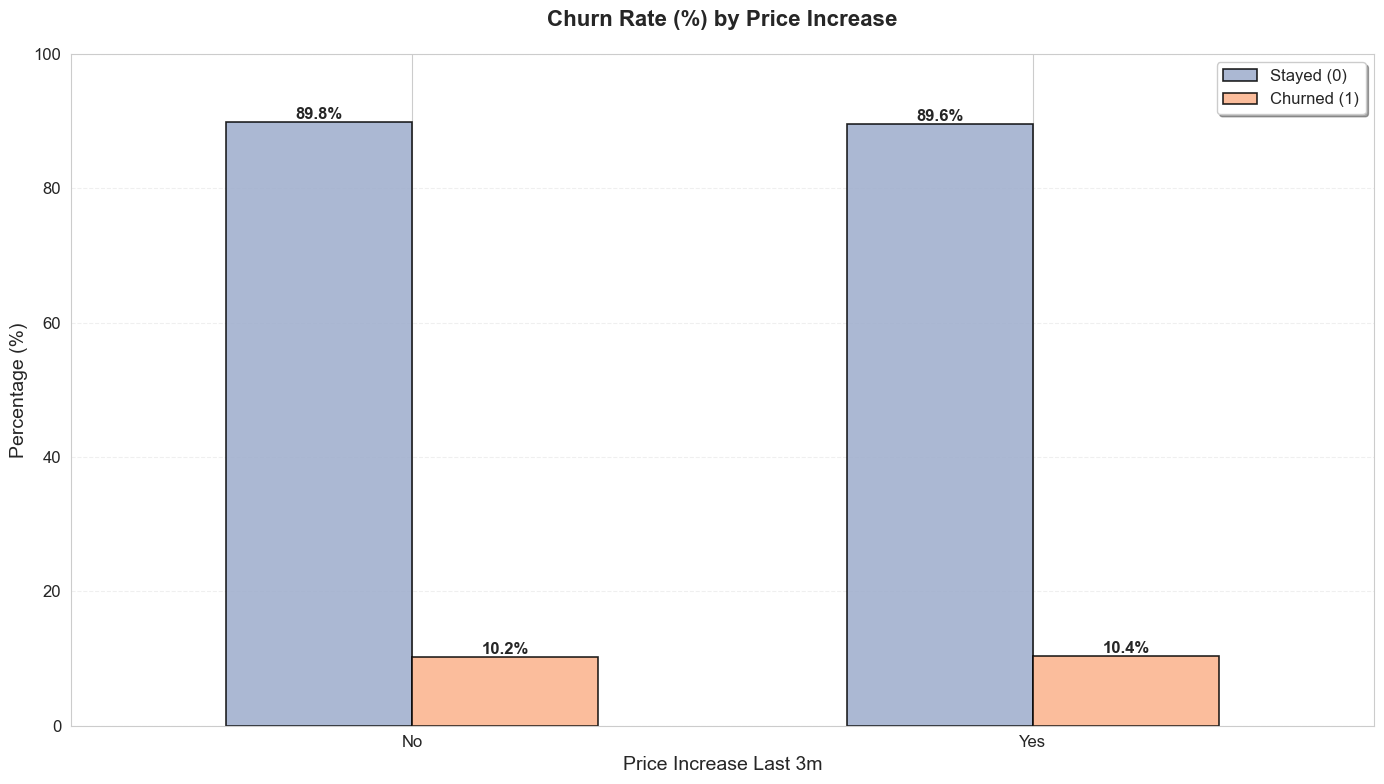

In [ ]:
## How did customer churn change after the price increase compared to those who were not affected?

##Check all values
df["price_increase_last_3m"].value_counts()

import numpy as np

# Build the table
price_churn_count = pd.crosstab(
    df['price_increase_last_3m'], 
    df['churn']
)

# Table with percentages by row (% of each group)
price_churn_percent = pd.crosstab(
    df['price_increase_last_3m'], 
    df['churn'], 
    normalize='index'
) * 100

print("Amount of users:")
print(price_churn_count)
print("\nPercentage (%)")
print(price_churn_percent.round(2))

#Visuallisation
price_churn_percent = pd.crosstab(
    df['price_increase_last_3m'], 
    df['churn'], 
    normalize='index'
) * 100

# Create the shape and axes separately
fig, ax = plt.subplots(figsize=(14, 8))

price_churn_percent.plot(
    kind='bar', 
    ax=ax,  # Clearly indicate the axes
    color=['#9DACCC', '#FBB28B'],
    edgecolor='black',
    linewidth=1.2,
    alpha=0.85,
    width=0.6
)

ax.set_title('Churn Rate (%) by Price Increase', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Price Increase Last 3m', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.legend(['Stayed (0)', 'Churned (1)'], 
          loc='upper right',
          fontsize=12,
          frameon=True,
          fancybox=True,
          shadow=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add percentages to columns
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/h8/k1l_5mk10p1gqlw490kxksgw0000gn/T/ipykernel_86228/1212469363.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


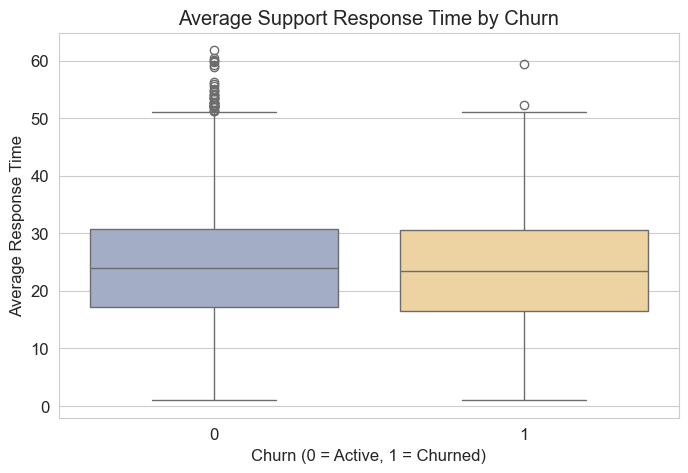

In [ ]:
## How is avg_response_time related to churn?
import seaborn as sns

df[['churn', 'avg_resolution_time']].head()
df_clean = df.dropna(subset=['avg_resolution_time', 'churn'])

## Statistical description of response time for each group
df_clean.groupby('churn')['avg_resolution_time'].describe()

## Visuallisation
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df_clean,
    x='churn',
    y='avg_resolution_time',
    palette={'0': '#9DACCC', '1': '#F8D794'} 
)

plt.title('Average Support Response Time by Churn')
plt.xlabel('Churn (0 = Active, 1 = Churned)')
plt.ylabel('Average Response Time')

plt.show()





Min csat: 1.0
Max csat: 5.0
Mean csat: 3.4867
___________


/var/folders/h8/k1l_5mk10p1gqlw490kxksgw0000gn/T/ipykernel_86228/2877055958.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("csat_category")


,csat_category,users,churn_rate_csat
0,Bad,1543,25.66
1,Neutral,3380,7.93
2,Good,5077,7.03


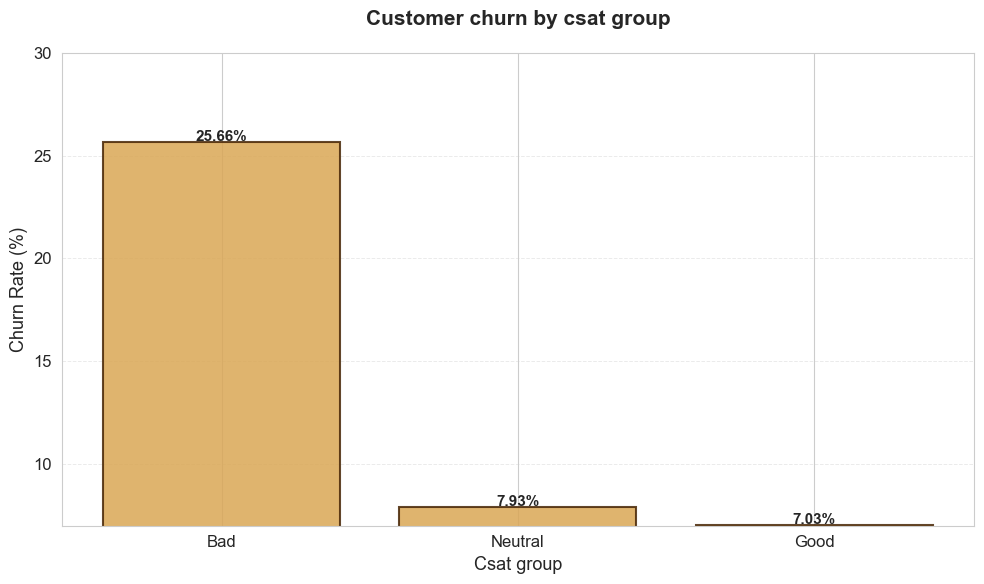

In [ ]:

## How does churn change when CSAT is low?

##Checking for anomalies
csat = df["csat_score"].describe()
print(f"Min csat: {csat['min']}")
print(f"Max csat: {csat['max']}")
print(f"Mean csat: {csat['mean']}")
print("___________")

##Distribution by groups
df["csat_category"] = pd.cut(
    df["csat_score"],
    bins=[0, 2.5, 3, df["csat_score"].max()],
    labels=["Bad", "Neutral", "Good"]
)

##Calculating churn rate by csat score
churn_by_csat = (
    df.groupby("csat_category")
      .agg(
          users=("customer_id", "count"),
          churn_rate_csat=("churn", lambda x: round(x.mean() * 100, 2))
      )
      .reset_index()
)

churn_by_csat
display(churn_by_csat)

##Visualization in graphics

plt.figure(figsize=(10, 6))
plt.bar(churn_by_csat["csat_category"], churn_by_csat["churn_rate_csat"], 
        color='#DAA755', edgecolor='#462506', linewidth=1.5, alpha=0.85)

plt.xlabel('Csat group', fontsize=13)
plt.ylabel('Churn Rate (%)', fontsize=13)
plt.title('Customer churn by csat group', fontsize=15, fontweight='bold', pad=20)

plt.ylim(7, 30)  # from 9% to 11%

## Add values to columns
for i, v in enumerate(churn_by_csat["churn_rate_csat"]):
    plt.text(i, v + 0.05, f'{v:.2f}%', ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.4, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

count    10000.000000
mean         9.505200
std          9.799417
min          0.000000
25%          2.000000
50%          6.000000
75%         13.000000
max         80.000000
Name: last_login_days_ago, dtype: float64
___________
    last_login_days_ago  users  churn_rate  churn_rate_rolling
0                     0    931        9.99               10.05
1                     1    841       10.23                9.96
2                     2    773        9.96                9.81
3                     3    679       10.01                9.79
4                     4    678        9.59                9.95
..                  ...    ...         ...                 ...
56                   56      1      100.00               29.52
57                   57      3        0.00               41.43
58                   58      2       50.00               45.00
59                   59      3        0.00               50.00
60                   60      1      100.00               37.50

[61 rows x 4 

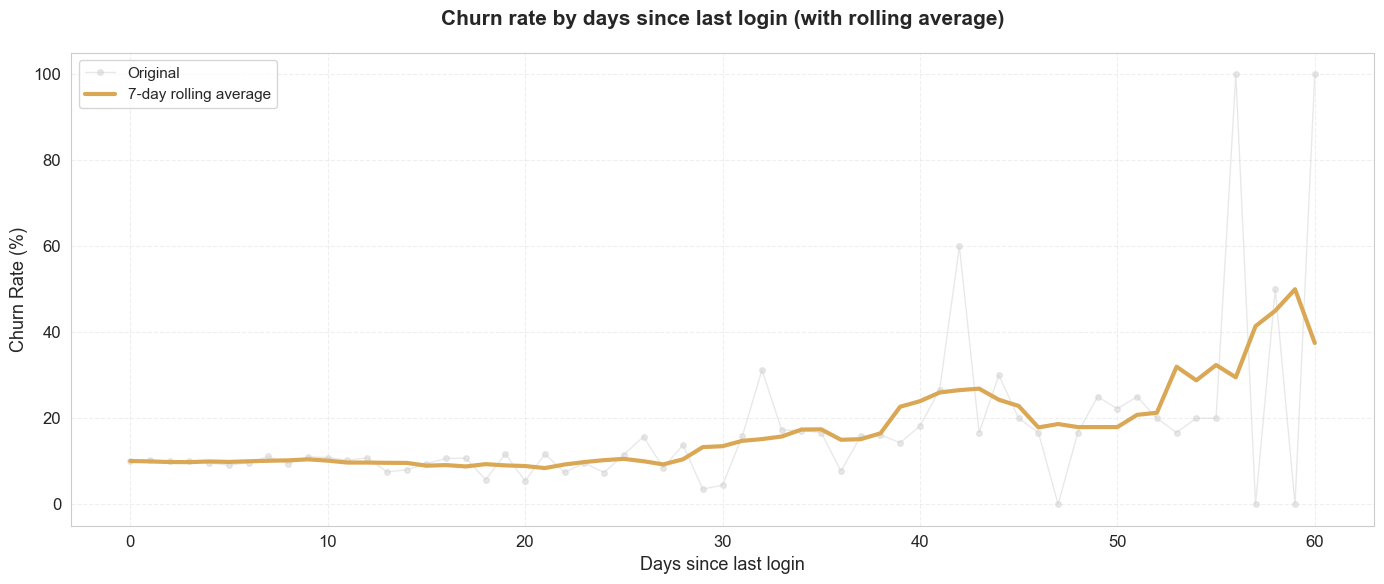

In [ ]:
##Does churn increase after a certain period of user inactivity (e.g., 14 days), and how does the risk evolve as inactivity grows?

##Checking for anomalies
last_login_days_ago = df["last_login_days_ago"].describe()
print(last_login_days_ago)
print("___________")

##Calculating churn rate by last login days
churn_by_last_login_days_ago = (
    df[df['last_login_days_ago'] <= 60]  # Filter up to 60 days
    .groupby("last_login_days_ago")
    .agg(
        users=("customer_id", "count"),
        churn_rate=("churn", lambda x: round(x.mean() * 100, 2))
    )
    .reset_index()
    .sort_values("last_login_days_ago")
)

# Add a moving average (7-day window)
churn_by_last_login_days_ago['churn_rate_rolling'] = (
    churn_by_last_login_days_ago['churn_rate']
    .rolling(window=7, min_periods=1, center=True)
    .mean()
    .round(2)
)

print(churn_by_last_login_days_ago)

plt.figure(figsize=(14, 6))

# Original data (semi-transparent)
plt.plot(churn_by_last_login_days_ago["last_login_days_ago"], 
         churn_by_last_login_days_ago["churn_rate"], 
         marker='o', linewidth=1, markersize=4, color='lightgray', 
         alpha=0.5, label='Original')

# Smoothed data (bright)
plt.plot(churn_by_last_login_days_ago["last_login_days_ago"], 
         churn_by_last_login_days_ago["churn_rate_rolling"], 
         linewidth=3, color='#DAA755', label='7-day rolling average')

plt.xlabel('Days since last login', fontsize=13)
plt.ylabel('Churn Rate (%)', fontsize=13)
plt.title('Churn rate by days since last login (with rolling average)', 
          fontsize=15, fontweight='bold', pad=20)
plt.legend(fontsize=11)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

count    10000.000000
mean         0.499610
std          0.231601
min          0.100000
25%          0.300000
50%          0.500000
75%          0.700000
max          0.900000
Name: email_open_rate, dtype: float64
___________


/var/folders/h8/k1l_5mk10p1gqlw490kxksgw0000gn/T/ipykernel_86228/2134342295.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("email_open_rate_category")


,email_open_rate_category,users,churn_rate_csat
0,Low,2594,9.71
1,Medium,2463,10.31
2,High,4943,10.42


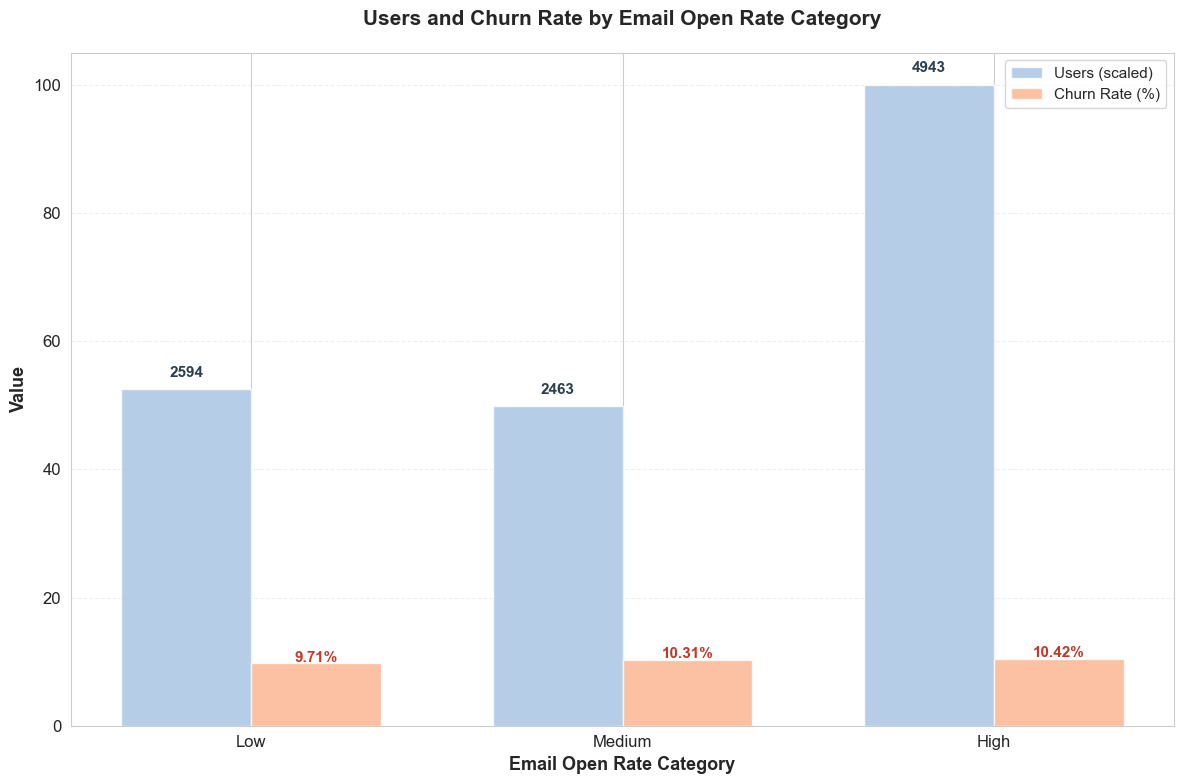

In [ ]:
##Do customers with low email open rates have higher churn rates compared to others?

##Checking for anomalies
email_open_rate = df["email_open_rate"].describe()
print(email_open_rate)
print("___________")

##Distribution by groups
df["email_open_rate_category"] = pd.cut(
    df["email_open_rate"],
    bins=[0, 0.3, 0.5, df["csat_score"].max()],
    labels=["Low", "Medium", "High"]
)

##Calculating churn rate by email_open_rate_category
churn_by_email_open_rate = (
    df.groupby("email_open_rate_category")
      .agg(
          users=("customer_id", "count"),
          churn_rate_csat=("churn", lambda x: round(x.mean() * 100, 2))
      )
      .reset_index()
)

churn_by_email_open_rate
display(churn_by_email_open_rate)

##Grouped bar plot with normalization
fig, ax = plt.subplots(figsize=(12, 8))

x = range(len(churn_by_email_open_rate))
width = 0.35

categories = churn_by_email_open_rate['email_open_rate_category']

max_users = churn_by_email_open_rate['users'].max()
normalized_users = (churn_by_email_open_rate['users'] / max_users) * 100

# Columns for users (normalized)
bars1 = ax.bar([i - width/2 for i in x], normalized_users,
               width, label='Users (scaled)', color='#A3C1E2', alpha=0.8)

# Columns for churn rate
bars2 = ax.bar([i + width/2 for i in x], churn_by_email_open_rate['churn_rate_csat'],
               width, label='Churn Rate (%)', color='#FBB28B', alpha=0.8)

# Add real values to columns
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    # Реальна кількість users
    ax.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 2,
            f'{churn_by_email_open_rate["users"].iloc[i]}',
            ha='center', fontsize=11, fontweight='bold', color='#2c3e50')
    
    # Churn rate percentage
    ax.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 0.3,
            f'{churn_by_email_open_rate["churn_rate_csat"].iloc[i]:.2f}%',
            ha='center', fontsize=11, fontweight='bold', color='#c0392b')

ax.set_xlabel('Email Open Rate Category', fontsize=13, fontweight='bold')
ax.set_ylabel('Value', fontsize=13, fontweight='bold')
ax.set_title('Users and Churn Rate by Email Open Rate Category', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Overall average churn rate: 10.21%
  complaint_type  users  churn_rate
0        Billing   2427       10.18
1        Service   2030        9.95
2      Technical   3498       10.32


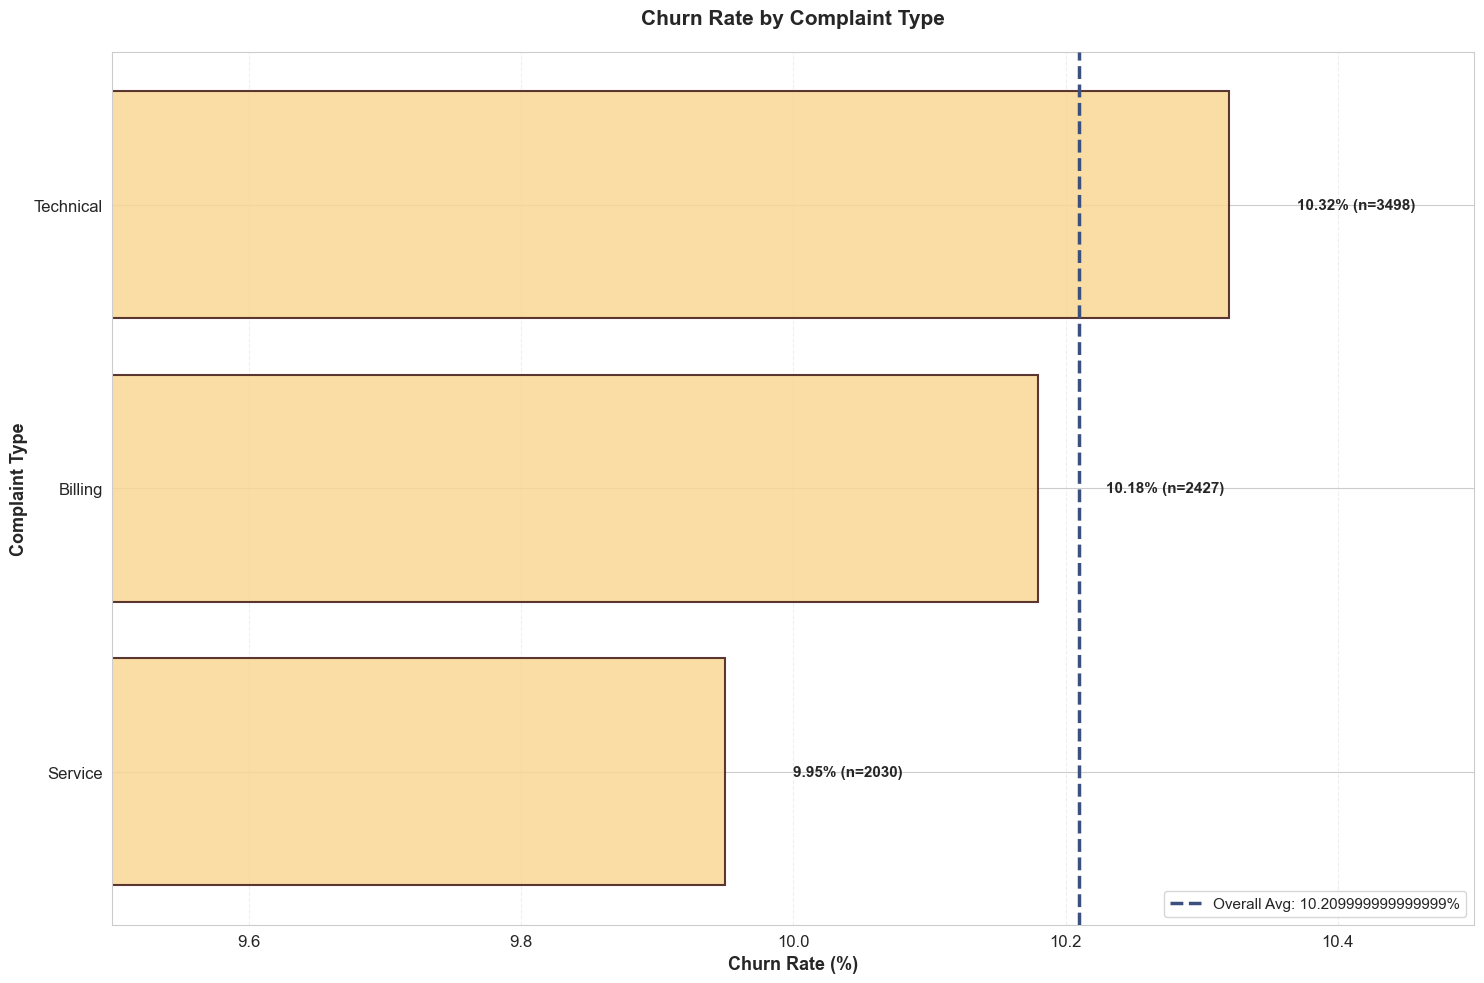

In [ ]:
##What types of support requests are associated with the highest churn rates?

# Overall churn rate
avg_churn = df['churn'].mean() * 100
print(f"Overall average churn rate: {avg_churn:.2f}%")

##Calculating churn rate by complaint_type
churn_by_last_complaint_type = (
    df.groupby("complaint_type")
    .agg(
        users=("customer_id", "count"),
        churn_rate=("churn", lambda x: round(x.mean() * 100, 2))
    )
    .reset_index()
    .sort_values("complaint_type")
)

print(churn_by_last_complaint_type)

##Horizontal bar chart for complaint types
plt.figure(figsize=(15, 10))

# Sorting by churn rate
data_sorted = churn_by_last_complaint_type.sort_values('churn_rate', ascending=True)

# Bars for churn rate by complain type
bars = plt.barh(data_sorted['complaint_type'], data_sorted['churn_rate'], 
                color='#F8D794', edgecolor='#3E1613', linewidth=1.5, alpha=0.85)

# AVG churn line
plt.axvline(x=avg_churn, color='#3C507D', linestyle='--', linewidth=2.5, 
            label=f'Overall Avg: {avg_churn}%', zorder=10)

# Adding values
for i, (bar, row) in enumerate(zip(bars, data_sorted.itertuples())):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
            f'{row.churn_rate:.2f}% (n={row.users})',
            va='center', fontsize=11, fontweight='bold')

plt.xlabel('Churn Rate (%)', fontsize=13, fontweight='bold')
plt.ylabel('Complaint Type', fontsize=13, fontweight='bold')
plt.title('Churn Rate by Complaint Type', 
          fontsize=15, fontweight='bold', pad=20)
plt.xlim(9.5, 10.5) 
plt.legend(fontsize=11, loc='lower right')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


count    10000.000000
mean      1057.018000
std       1020.148233
min         10.000000
25%        340.000000
50%        720.000000
75%       1440.000000
max       5900.000000
Name: total_revenue, dtype: float64
___________
churn
0    9707540
1     862640
Name: total_revenue, dtype: int64


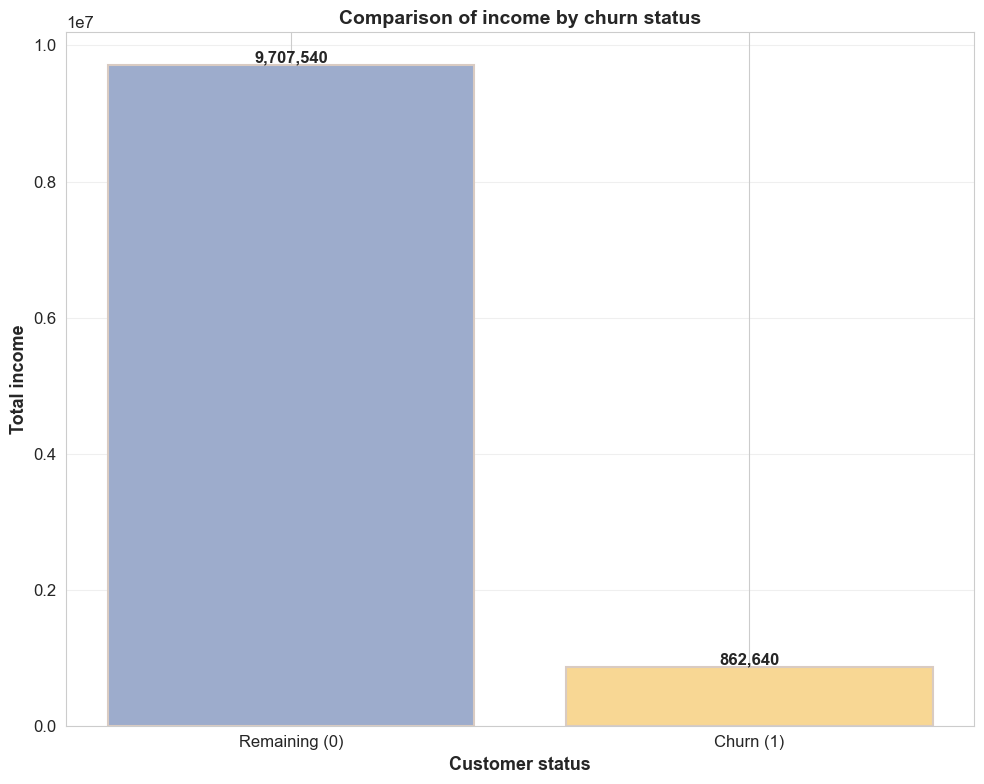

contract_type
Monthly      449970
Quarterly    239380
Yearly       173290
Name: total_revenue, dtype: int64
contract_type
Monthly      4789460
Quarterly    2991310
Yearly       1926770
Name: total_revenue, dtype: int64


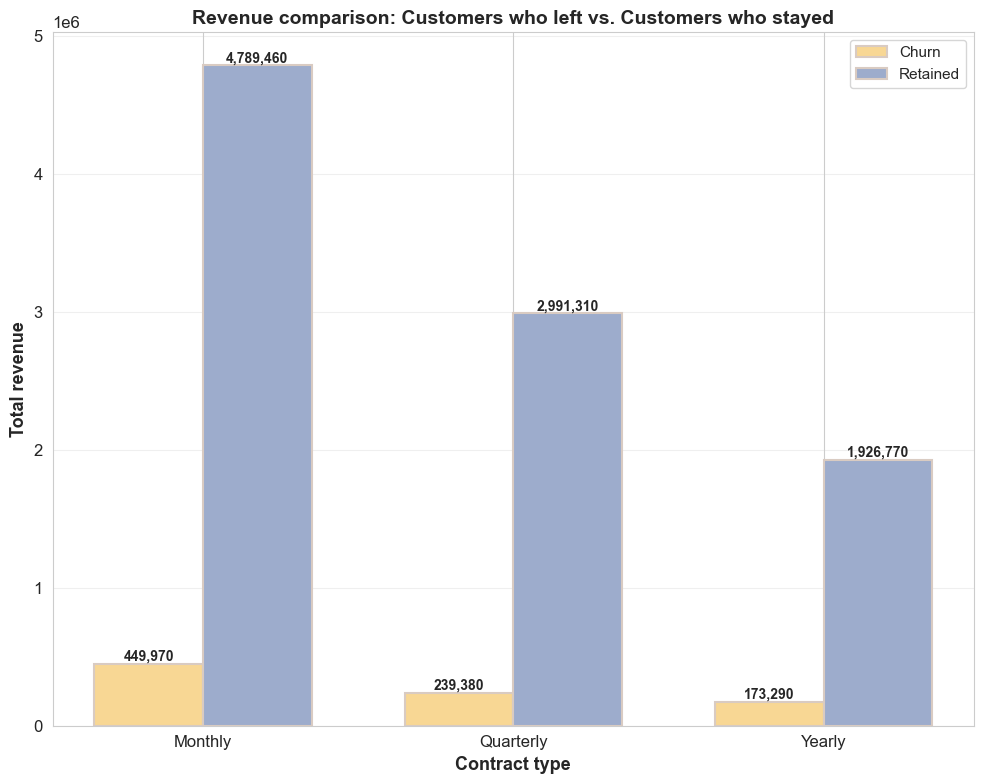

tenure_group
0–6       29990
7–12      29320
13–24    119840
24-48    379670
48-59    303820
Name: total_revenue, dtype: int64
tenure_group
0–6        93730
7–12      308640
13–24    1157660
24-48    4839150
48-59    3308360
Name: total_revenue, dtype: int64


/var/folders/h8/k1l_5mk10p1gqlw490kxksgw0000gn/T/ipykernel_86228/1745919894.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_revenue_for_tenure = df[df['churn'] == 1].groupby('tenure_group')['total_revenue'].sum()
/var/folders/h8/k1l_5mk10p1gqlw490kxksgw0000gn/T/ipykernel_86228/1745919894.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retained_revenue_for_tenure = df[df['churn'] == 0].groupby('tenure_group')['total_revenue'].sum()


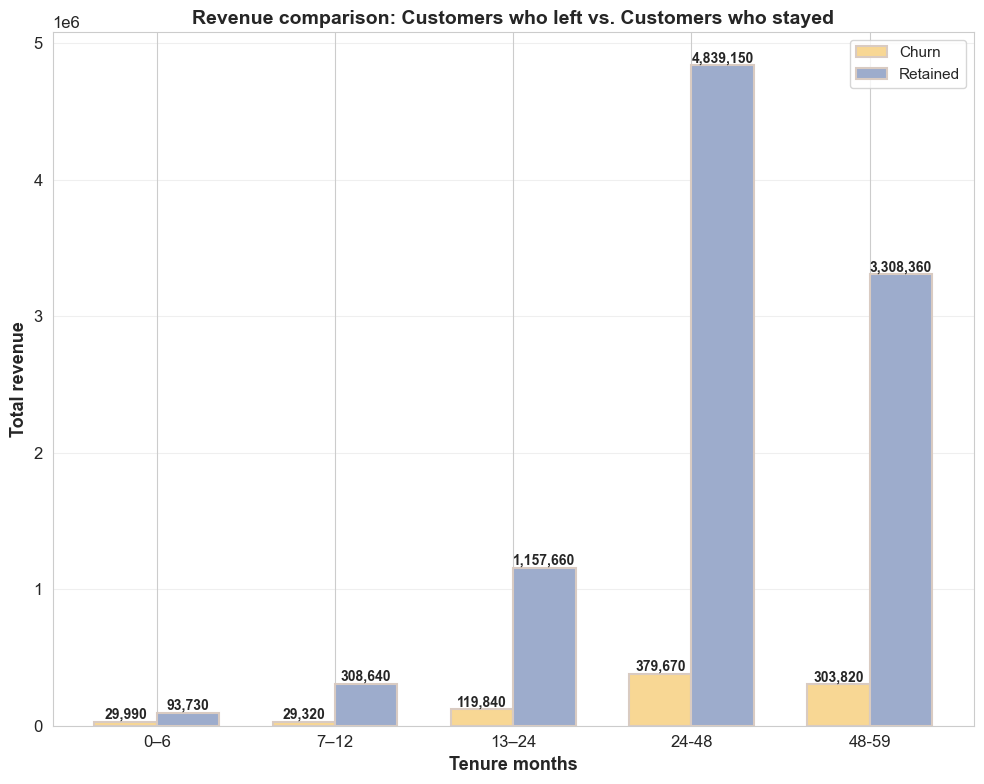

In [ ]:
## What is the financial impact of churn, and which segments generate the greatest revenue losses?

##Checking for anomalies
total_revenue = df["total_revenue"].describe()
print(total_revenue)
print("___________")

## The total_revenue amount for each category
sum_revenue = df.groupby('churn')['total_revenue'].sum()
print(sum_revenue)

# Visualisation
plt.figure(figsize=(10, 8))

colors = ['#9DACCC', '#F8D794']
bars = plt.bar(sum_revenue.index, sum_revenue.values, color=colors, edgecolor='#D9CBC2', linewidth=1.5)

plt.xlabel('Customer status', fontweight='bold', fontsize=13)
plt.ylabel('Total income', fontweight='bold', fontsize=13)
plt.title('Comparison of income by churn status', fontweight='bold', fontsize=14)
plt.xticks([0, 1], ['Remaining (0)', 'Churn (1)'])
plt.grid(axis='y', alpha=0.3)

# Add values to columns
for i, (idx, val) in enumerate(sum_revenue.items()):
    plt.text(i, val, f'{int(val):,}',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

## Calculating revenue for churned by contract type (departed) customers
churned_revenue = df[df['churn'] == 1].groupby('contract_type')['total_revenue'].sum()
print(churned_revenue)

# Calculating revenue for those who stayed contract type
retained_revenue = df[df['churn'] == 0].groupby('contract_type')['total_revenue'].sum()
print(retained_revenue)

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Positions for bars
x = range(len(churned_revenue.index))
width = 0.35

# Creating bars
bars1 = ax.bar([i - width/2 for i in x], churned_revenue.values, 
               width, label='Churn', color='#F8D794', edgecolor='#D9CBC2', linewidth=1.5)
bars2 = ax.bar([i + width/2 for i in x], retained_revenue.values, 
               width, label='Retained', color='#9DACCC', edgecolor='#D9CBC2', linewidth=1.5)

# Schedule settings
ax.set_xlabel('Contract type', fontweight='bold', fontsize=13)
ax.set_ylabel('Total revenue', fontweight='bold', fontsize=13)
ax.set_title('Revenue comparison: Customers who left vs. Customers who stayed', 
             fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(churned_revenue.index)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Adding values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

## Calculating revenue for churned customers by tenure (departed)
churned_revenue_for_tenure = df[df['churn'] == 1].groupby('tenure_group')['total_revenue'].sum()
print(churned_revenue_for_tenure)

# Calculating revenue for retained by tenure (remaining)
retained_revenue_for_tenure = df[df['churn'] == 0].groupby('tenure_group')['total_revenue'].sum()
print(retained_revenue_for_tenure)

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))

x = range(len(churned_revenue_for_tenure.index))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], churned_revenue_for_tenure.values, 
               width, label='Churn', color='#F8D794', edgecolor='#D9CBC2', linewidth=1.5)
bars2 = ax.bar([i + width/2 for i in x], retained_revenue_for_tenure.values, 
               width, label='Retained', color='#9DACCC', edgecolor='#D9CBC2', linewidth=1.5)

ax.set_xlabel('Tenure months', fontweight='bold', fontsize=13)
ax.set_ylabel('Total revenue', fontweight='bold', fontsize=13)
ax.set_title('Revenue comparison: Customers who left vs. Customers who stayed', 
             fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(churned_revenue_for_tenure.index)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()
